<a href="https://colab.research.google.com/github/Found-Bugs/Pengolahan-Citra-Visi-Komputer/blob/Week-9/Morfologi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

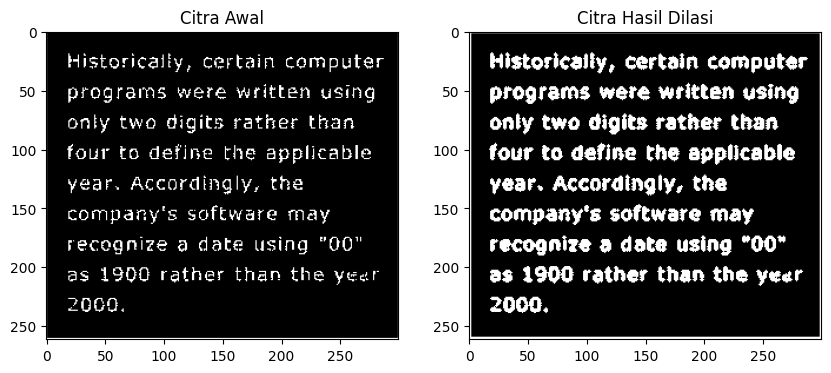

In [70]:
# Load the image
image_path = '/content/drive/MyDrive/PCVK/Images/morphology.png'
image = cv2.imread(image_path, 0)

# Structuring Element Cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])

# Binarize the image using a threshold
_, binary_image = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)

# Function to perform dilation
def dilasi(image, kernel):
    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2
    padded_image = np.pad(image, ((pad_h, pad_w), (pad_w, pad_h)), mode='constant', constant_values=0)

    dilated_image = np.zeros_like(image)

    for i in range(pad_h, padded_image.shape[0] - pad_h):
        for j in range(pad_w, padded_image.shape[1] - pad_w):
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            if np.any(region[kernel == 1]):
                dilated_image[i - pad_h, j - pad_w] = 1
            else:
                dilated_image[i - pad_h, j - pad_w] = 0

    return dilated_image

# Perform dilation on the binary image
dilated_image = dilasi(binary_image, kernel)

# Plotting the original and dilated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.show()

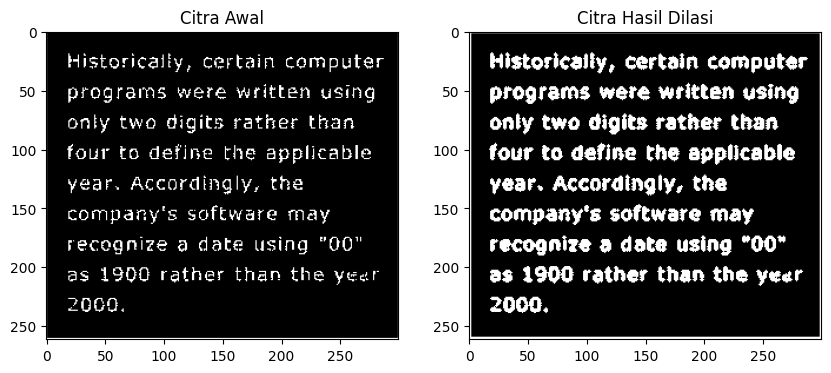

In [71]:
# Membaca citra dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', 0)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element berbentuk cross 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi menggunakan morphology dari OpenCV
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Menampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.show()

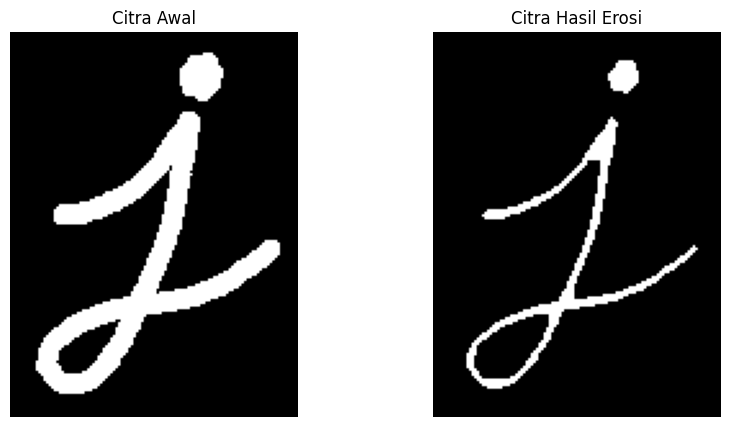

In [72]:
# Fungsi untuk melakukan erosi
def erosi(image, kernel):
    # Ukuran kernel
    k_h, k_w = kernel.shape
    # Padding pada gambar sesuai dengan ukuran kernel
    pad_h = k_h // 2
    pad_w = k_w // 2
    padded_image = np.pad(image, ((pad_h, pad_w), (pad_w, pad_h)), mode='constant', constant_values=1)

    # Buat salinan dari citra asli untuk menyimpan hasil erosi
    eroded_image = np.ones_like(image)

    # Iterasi untuk setiap piksel dalam citra
    for i in range(pad_h, padded_image.shape[0] - pad_h):
        for j in range(pad_w, padded_image.shape[1] - pad_w):
            # Ambil sub-matrix yang seukuran dengan kernel
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            # Jika semua nilai dalam region yang sesuai dengan kernel adalah 1, maka set pixel tetap 1
            if np.all(region[kernel == 1]):
                eroded_image[i - pad_h, j - pad_w] = 1
            else:
                eroded_image[i - pad_h, j - pad_w] = 0

    return eroded_image

# Structuring Element Square 5x5
kernel = np.ones((5, 5), dtype=np.uint8)

# Baca citra dalam format grayscale (0 untuk mode grayscale)
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', 0)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)

# Lakukan operasi erosi
eroded_image = erosi(binary_image, kernel)

# Tampilkan hasilnya
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Citra Awal')
axes[0].axis('off')

axes[1].imshow(eroded_image, cmap='gray')
axes[1].set_title('Citra Hasil Erosi')
axes[1].axis('off')

plt.show()

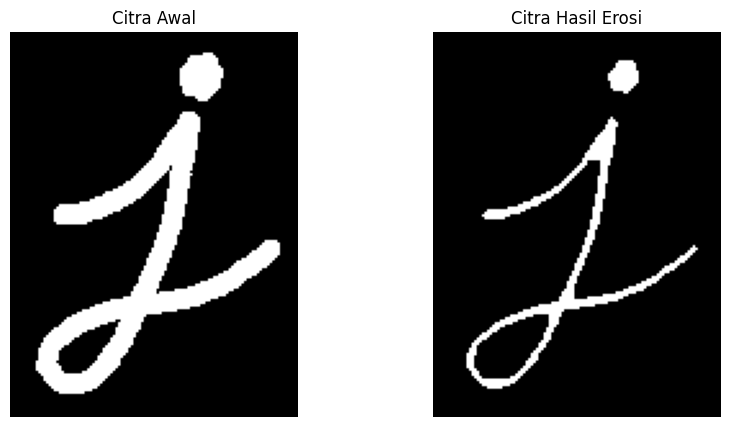

In [73]:
# Membaca citra dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', 0)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element berbentuk square 5x5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Melakukan operasi erosi menggunakan morphology dari OpenCV
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Menampilkan citra asli dan hasil erosi
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Citra Awal')
axes[0].axis('off')

axes[1].imshow(eroded_image, cmap='gray')
axes[1].set_title('Citra Hasil Erosi')
axes[1].axis('off')

plt.show()

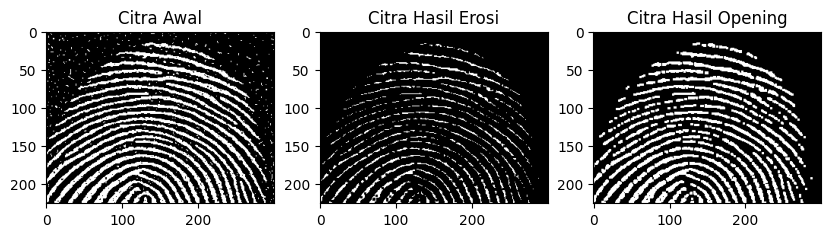

In [74]:
# Fungsi untuk melakukan erosi
def erosi(image, kernel):
    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2
    padded_image = np.pad(image, ((pad_h, pad_w), (pad_w, pad_h)), mode='constant', constant_values=1)
    eroded_image = np.ones_like(image)

    for i in range(pad_h, padded_image.shape[0] - pad_h):
        for j in range(pad_w, padded_image.shape[1] - pad_w):
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            if np.all(region[kernel == 1]):
                eroded_image[i - pad_h, j - pad_w] = 1
            else:
                eroded_image[i - pad_h, j - pad_w] = 0

    return eroded_image

# Fungsi untuk melakukan dilasi
def dilasi(image, kernel):
    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2
    padded_image = np.pad(image, ((pad_h, pad_w), (pad_w, pad_h)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)

    for i in range(pad_h, padded_image.shape[0] - pad_h):
        for j in range(pad_w, padded_image.shape[1] - pad_w):
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            if np.any(region[kernel == 1]):
                dilated_image[i - pad_h, j - pad_w] = 1
            else:
                dilated_image[i - pad_h, j - pad_w] = 0

    return dilated_image

# Fungsi untuk melakukan operasi opening
def opening(image, kernel):
    # Langkah 1: Erosi
    eroded_image = erosi(image, kernel)
    # Langkah 2: Dilasi
    opened_image = dilasi(eroded_image, kernel)
    return opened_image

# Structuring Element Square 3x3
kernel = np.ones((3, 3), dtype=np.uint8)

# Baca citra dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', 0)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)

# Lakukan operasi erosi terlebih dahulu
eroded_image = erosi(binary_image, kernel)

# Lakukan operasi opening
opened_image = opening(binary_image, kernel)

# Tampilkan citra awal, citra hasil erosi, dan citra hasil opening
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')
plt.show()

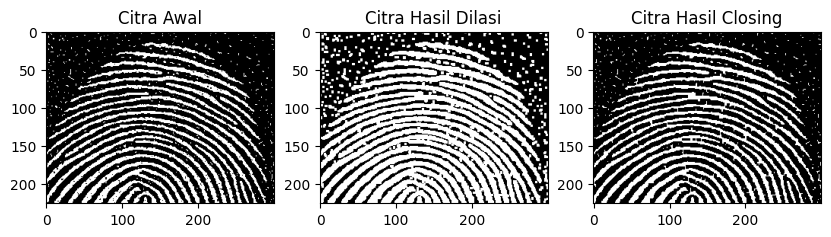

In [75]:
# Fungsi untuk melakukan dilasi
def dilasi(image, kernel):
    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2
    padded_image = np.pad(image, ((pad_h, pad_w), (pad_w, pad_h)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)

    for i in range(pad_h, padded_image.shape[0] - pad_h):
        for j in range(pad_w, padded_image.shape[1] - pad_w):
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            if np.any(region[kernel == 1]):
                dilated_image[i - pad_h, j - pad_w] = 1
            else:
                dilated_image[i - pad_h, j - pad_w] = 0

    return dilated_image

# Fungsi untuk melakukan erosi
def erosi(image, kernel):
    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2
    padded_image = np.pad(image, ((pad_h, pad_w), (pad_w, pad_h)), mode='constant', constant_values=1)
    eroded_image = np.ones_like(image)

    for i in range(pad_h, padded_image.shape[0] - pad_h):
        for j in range(pad_w, padded_image.shape[1] - pad_w):
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            if np.all(region[kernel == 1]):
                eroded_image[i - pad_h, j - pad_w] = 1
            else:
                eroded_image[i - pad_h, j - pad_w] = 0

    return eroded_image

# Fungsi untuk melakukan operasi closing
def closing(image, kernel):
    # Langkah 1: Dilasi
    dilated_image = dilasi(image, kernel)
    # Langkah 2: Erosi
    closed_image = erosi(dilated_image, kernel)
    return dilated_image, closed_image

# Structuring Element Square 3x3
kernel = np.ones((3, 3), dtype=np.uint8)

# Baca citra dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', 0)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)

# Lakukan operasi closing
dilated_image, closed_image = closing(binary_image, kernel)

# Tampilkan citra awal, citra hasil dilasi, dan citra hasil closing
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')
plt.show()

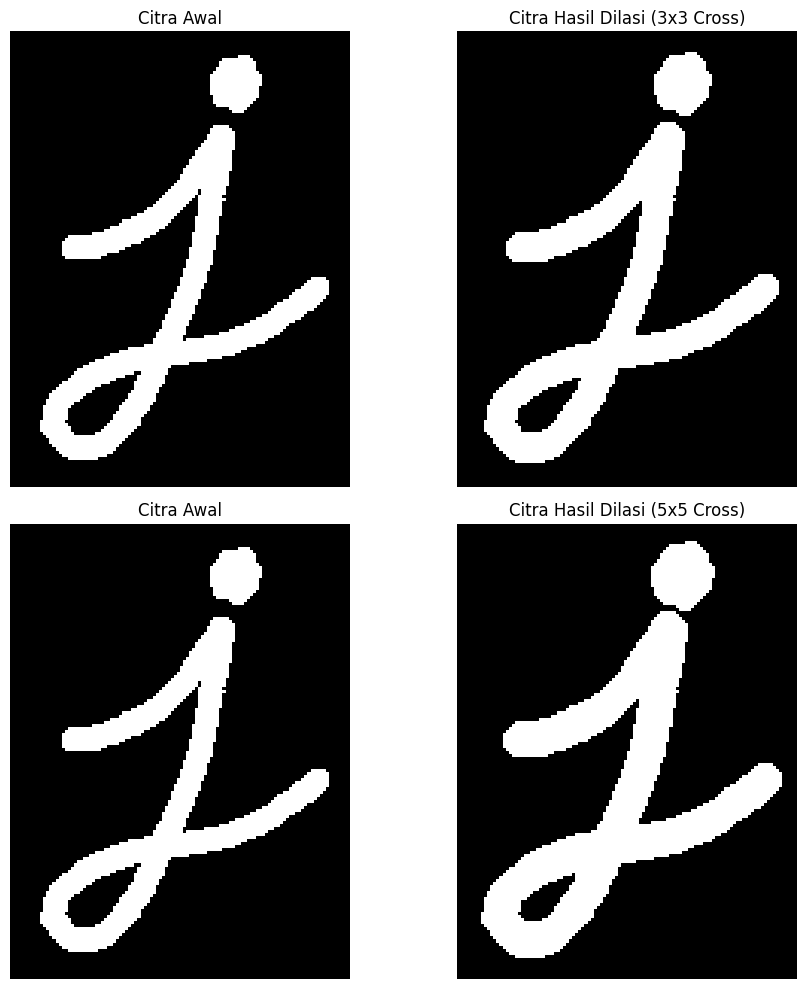

In [78]:
# Baca citra dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring elements cross 3x3 dan cross 5x5
kernel_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel_cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Lakukan dilasi dengan kedua structuring elements
dilated_image_3x3 = cv2.dilate(binary_image, kernel_cross_3x3)
dilated_image_5x5 = cv2.dilate(binary_image, kernel_cross_5x5)

# Tampilkan citra dalam dua baris
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Baris Pertama
axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Citra Awal')
axes[0, 0].axis('off')

axes[0, 1].imshow(dilated_image_3x3, cmap='gray')
axes[0, 1].set_title('Citra Hasil Dilasi (3x3 Cross)')
axes[0, 1].axis('off')

# Baris Kedua
axes[1, 0].imshow(binary_image, cmap='gray')
axes[1, 0].set_title('Citra Awal')
axes[1, 0].axis('off')

axes[1, 1].imshow(dilated_image_5x5, cmap='gray')
axes[1, 1].set_title('Citra Hasil Dilasi (5x5 Cross)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

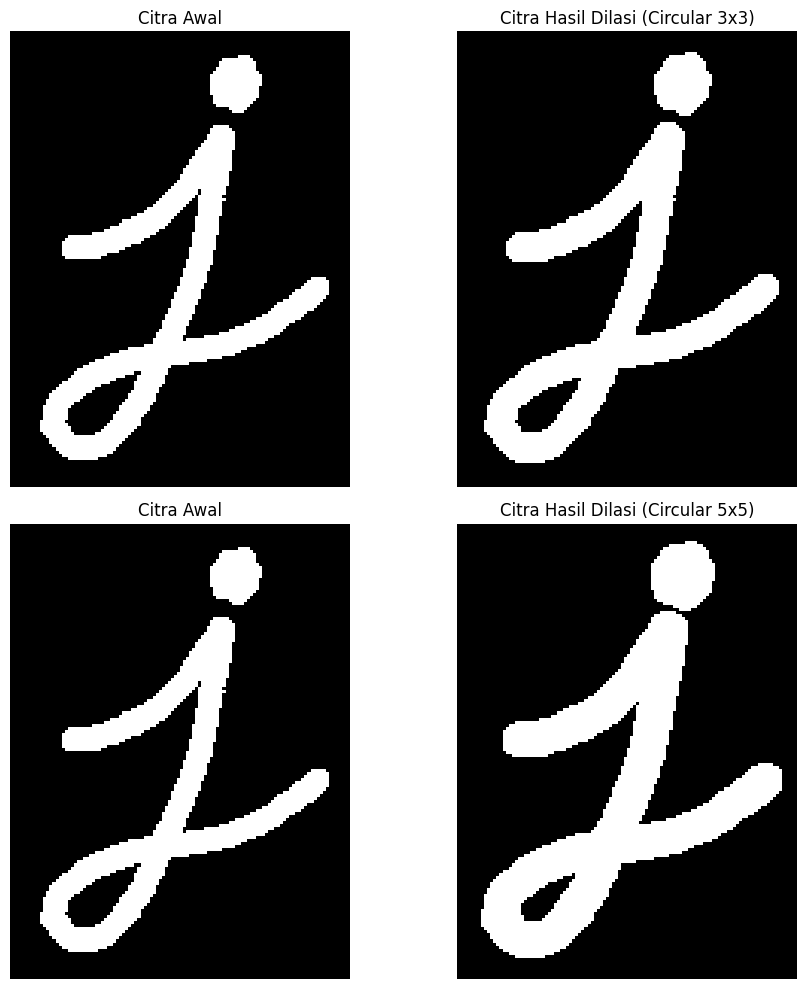

In [79]:
# Baca citra dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring elements circular 3x3 dan 5x5
kernel_circular_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel_circular_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Lakukan dilasi dengan kedua structuring elements
dilated_image_3x3 = cv2.dilate(binary_image, kernel_circular_3x3)
dilated_image_5x5 = cv2.dilate(binary_image, kernel_circular_5x5)

# Tampilkan citra dalam dua baris
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Baris Pertama
axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Citra Awal')
axes[0, 0].axis('off')

axes[0, 1].imshow(dilated_image_3x3, cmap='gray')
axes[0, 1].set_title('Citra Hasil Dilasi (Circular 3x3)')
axes[0, 1].axis('off')

# Baris Kedua
axes[1, 0].imshow(binary_image, cmap='gray')
axes[1, 0].set_title('Citra Awal')
axes[1, 0].axis('off')

axes[1, 1].imshow(dilated_image_5x5, cmap='gray')
axes[1, 1].set_title('Citra Hasil Dilasi (Circular 5x5)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

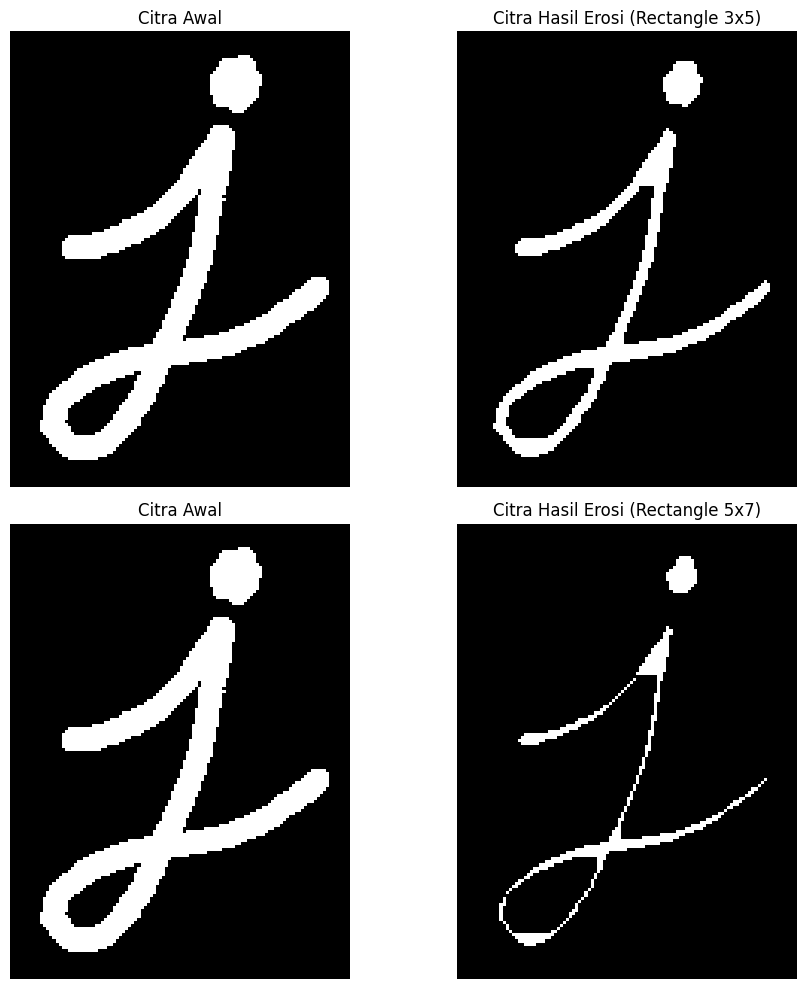

In [80]:
# Baca citra dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring elements rectangle 3x5 dan 5x7
kernel_rectangle_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
kernel_rectangle_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 5))

# Lakukan erosi dengan kedua structuring elements
eroded_image_3x5 = cv2.erode(binary_image, kernel_rectangle_3x5)
eroded_image_5x7 = cv2.erode(binary_image, kernel_rectangle_5x7)

# Tampilkan citra dalam dua baris
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Baris Pertama
axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Citra Awal')
axes[0, 0].axis('off')

axes[0, 1].imshow(eroded_image_3x5, cmap='gray')
axes[0, 1].set_title('Citra Hasil Erosi (Rectangle 3x5)')
axes[0, 1].axis('off')

# Baris Kedua
axes[1, 0].imshow(binary_image, cmap='gray')
axes[1, 0].set_title('Citra Awal')
axes[1, 0].axis('off')

axes[1, 1].imshow(eroded_image_5x7, cmap='gray')
axes[1, 1].set_title('Citra Hasil Erosi (Rectangle 5x7)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

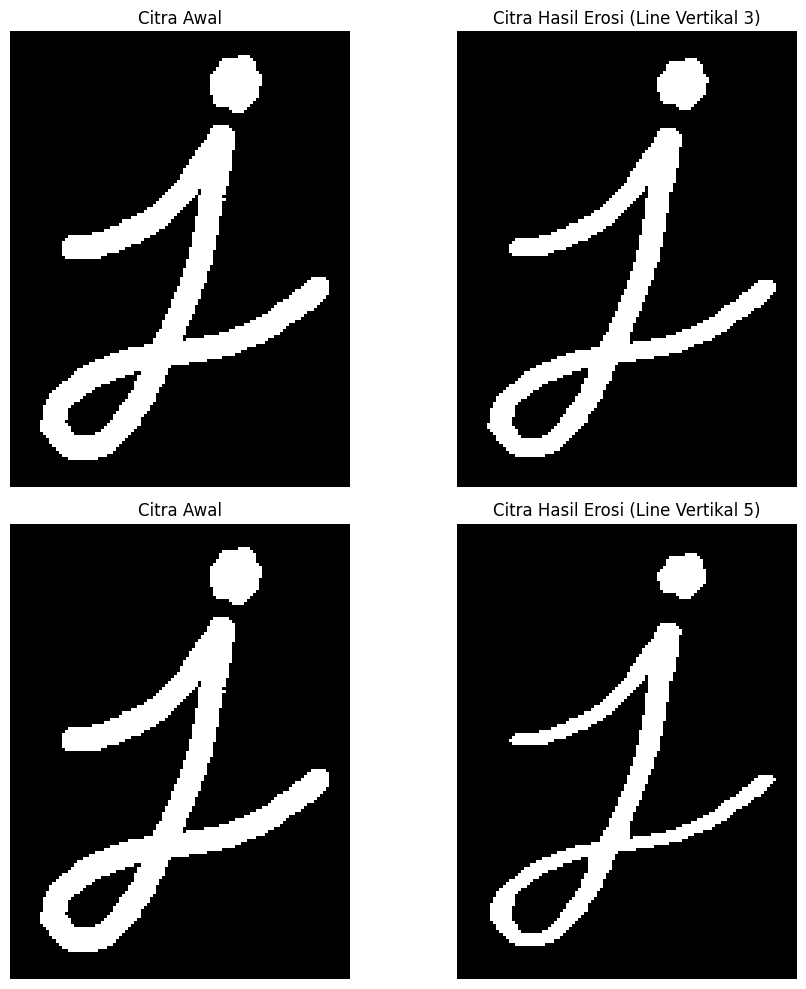

In [81]:
# Baca citra dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Konversi citra menjadi biner (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring elements line vertikal 3 dan 5
kernel_line_vertical_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
kernel_line_vertical_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# Lakukan erosi dengan kedua structuring elements
eroded_image_3 = cv2.erode(binary_image, kernel_line_vertical_3)
eroded_image_5 = cv2.erode(binary_image, kernel_line_vertical_5)

# Tampilkan citra dalam dua baris
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Baris Pertama
axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Citra Awal')
axes[0, 0].axis('off')

axes[0, 1].imshow(eroded_image_3, cmap='gray')
axes[0, 1].set_title('Citra Hasil Erosi (Line Vertikal 3)')
axes[0, 1].axis('off')

# Baris Kedua
axes[1, 0].imshow(binary_image, cmap='gray')
axes[1, 0].set_title('Citra Awal')
axes[1, 0].axis('off')

axes[1, 1].imshow(eroded_image_5, cmap='gray')
axes[1, 1].set_title('Citra Hasil Erosi (Line Vertikal 5)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()